In [2]:
#imports
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as sk
import folium
sns.set_theme(style='whitegrid', font_scale=1.3, palette='Set2')


/Users/andrejegorov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# New York Housing Market Analysis

In [3]:
df = pd.read_csv('NY-House-Dataset.csv')

In [4]:
df 

BROKERTITLE                TYPE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                   Brokered by Serhant      Condo for sale   
2                                Brokered by Sowae Corp      House for sale   
3                                   Brokered by COMPASS      Condo for sale   
4     Brokered by Sotheby's International Realty - E...  Townhouse for sale   
...                                                 ...                 ...   
4796                                Brokered by COMPASS      Co-op for sale   
4797                    Brokered by Mjr Real Estate Llc      Co-op for sale   
4798      Brokered by Douglas Elliman - 575 Madison Ave      Co-op for sale   
4799            Brokered by E Realty International Corp      Condo for sale   
4800                 Brokered by Nyc Realty Brokers Llc      Co-op for sale   

          PRICE  BEDS       BATH  PROPERTYSQFT  \
0        315000     2   2.000000   1400.000000   
1     195000000     7  10.000000  17545.000000   
2        260000     4   2.000000   2015.000000   
3         69000     3   1.000000    445.000000   
4      55000000     7   2.373861  14175.000000   
...         ...   ...        ...           ...   
4796     599000     1   1.000000   2184.207862   
4797     245000     1   1.000000   2184.207862   
4798    1275000     1   1.000000   2184.207862   
4799     598125     2   1.000000    655.000000   
4800     349000     1   1.000000    750.000000   

                                                ADDRESS  \
0                                  2 E 55th St Unit 803   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2                                      620 Sinclair Ave   
3                               2 E 55th St Unit 908W33   
4                                           5 E 64th St   
...                                                 ...   
4796                               222 E 80th St Apt 3A   
4797                                97-40 62 Dr Unit Lg   
4798                          427 W 21st St Unit Garden   
4799                           91-23 Corona Ave Unit 4G   
4800                            460 Neptune Ave Apt 14O   

                        STATE  \
0          New York, NY 10022   
1          New York, NY 10019   
2     Staten Island, NY 10312   
3         Manhattan, NY 10022   
4          New York, NY 10065   
...                       ...   
4796      Manhattan, NY 10075   
4797      Rego Park, NY 11374   
4798       New York, NY 10011   
4799       Elmhurst, NY 11373   
4800       Brooklyn, NY 11224   

                                           MAIN_ADDRESS  \
0                2 E 55th St Unit 803New York, NY 10022   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2               620 Sinclair AveStaten Island, NY 10312   
3            2 E 55th St Unit 908W33Manhattan, NY 10022   
4                         5 E 64th StNew York, NY 10065   
...                                                 ...   
4796            222 E 80th St Apt 3AManhattan, NY 10075   
4797             97-40 62 Dr Unit LgRego Park, NY 11374   
4798        427 W 21st St Unit GardenNew York, NY 10011   
4799         91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800          460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
0                New York County         New York        Manhattan   
1                  United States         New York  New York County   
2                  United States         New York  Richmond County   
3                  United States         New York  New York County   
4                  United States         New York  New York County   
...                          ...              ...              ...   
4796                    New York  New York County         New York   
4797               United States         New York    Queens County   
4798               United States         New York

In [5]:
df.describe()

PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.373861   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.946962   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450

In [6]:
df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [7]:
df.duplicated().value_counts()


False    4587
True      214
Name: count, dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.drop(['ADDRESS','STATE','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','LOCALITY','STREET_NAME', 'LONG_NAME','FORMATTED_ADDRESS'],axis=1,inplace=True)

In [10]:
df

BROKERTITLE                TYPE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                   Brokered by Serhant      Condo for sale   
2                                Brokered by Sowae Corp      House for sale   
3                                   Brokered by COMPASS      Condo for sale   
4     Brokered by Sotheby's International Realty - E...  Townhouse for sale   
...                                                 ...                 ...   
4796                                Brokered by COMPASS      Co-op for sale   
4797                    Brokered by Mjr Real Estate Llc      Co-op for sale   
4798      Brokered by Douglas Elliman - 575 Madison Ave      Co-op for sale   
4799            Brokered by E Realty International Corp      Condo for sale   
4800                 Brokered by Nyc Realty Brokers Llc      Co-op for sale   

          PRICE  BEDS       BATH  PROPERTYSQFT      SUBLOCALITY   LATITUDE  \
0        315000     2   2.000000   1400.000000        Manhattan  40.761255   
1     195000000     7  10.000000  17545.000000  New York County  40.766393   
2        260000     4   2.000000   2015.000000  Richmond County  40.541805   
3         69000     3   1.000000    445.000000  New York County  40.761398   
4      55000000     7   2.373861  14175.000000  New York County  40.767224   
...         ...   ...        ...           ...              ...        ...   
4796     599000     1   1.000000   2184.207862         New York  40.774350   
4797     245000     1   1.000000   2184.207862    Queens County  40.732538   
4798    1275000     1   1.000000   2184.207862  New York County  40.745882   
4799     598125     2   1.000000    655.000000           Queens  40.742770   
4800     349000     1   1.000000    750.000000         Brooklyn  40.579147   

      LONGITUDE  
0    -73.974483  
1    -73.980991  
2    -74.196109  
3    -73.974613  
4    -73.969856  
...         ...  
4796 -73.955879  
4797 -73.860152  
4798 -74.003398  
4799 -73.872752  
4800 -73.970949  

[4587 rows x 9 columns]

In [11]:
df.columns = df.columns.str.lower()

<Axes: xlabel='type'>

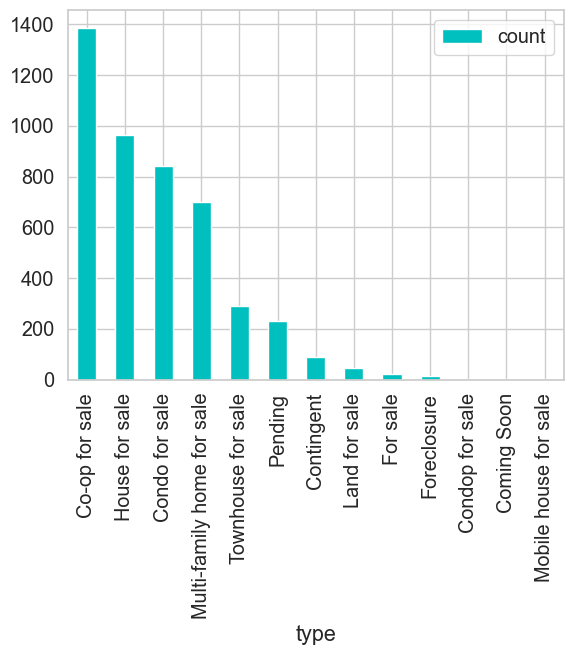

In [12]:
df['type'].value_counts().reset_index().plot(kind='bar',x='type', color='c')

<Axes: xlabel='propertysqft', ylabel='price'>

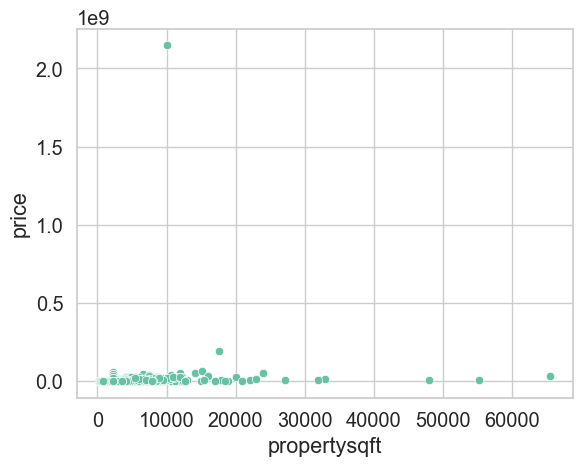

In [13]:
sns.scatterplot(data=df,x='propertysqft',y='price')

In [14]:
df1 = df.query('beds<18')

In [15]:
df1.drop(index=304,inplace=True)

/var/folders/lc/ffnfdhls4r705pmlf620r1jc0000gn/T/ipykernel_44519/2439241061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(index=304,inplace=True)


In [16]:
df1.query('propertysqft<15000',inplace=True)

/var/folders/lc/ffnfdhls4r705pmlf620r1jc0000gn/T/ipykernel_44519/2054780008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.query('propertysqft<15000',inplace=True)


<Axes: xlabel='propertysqft', ylabel='price'>

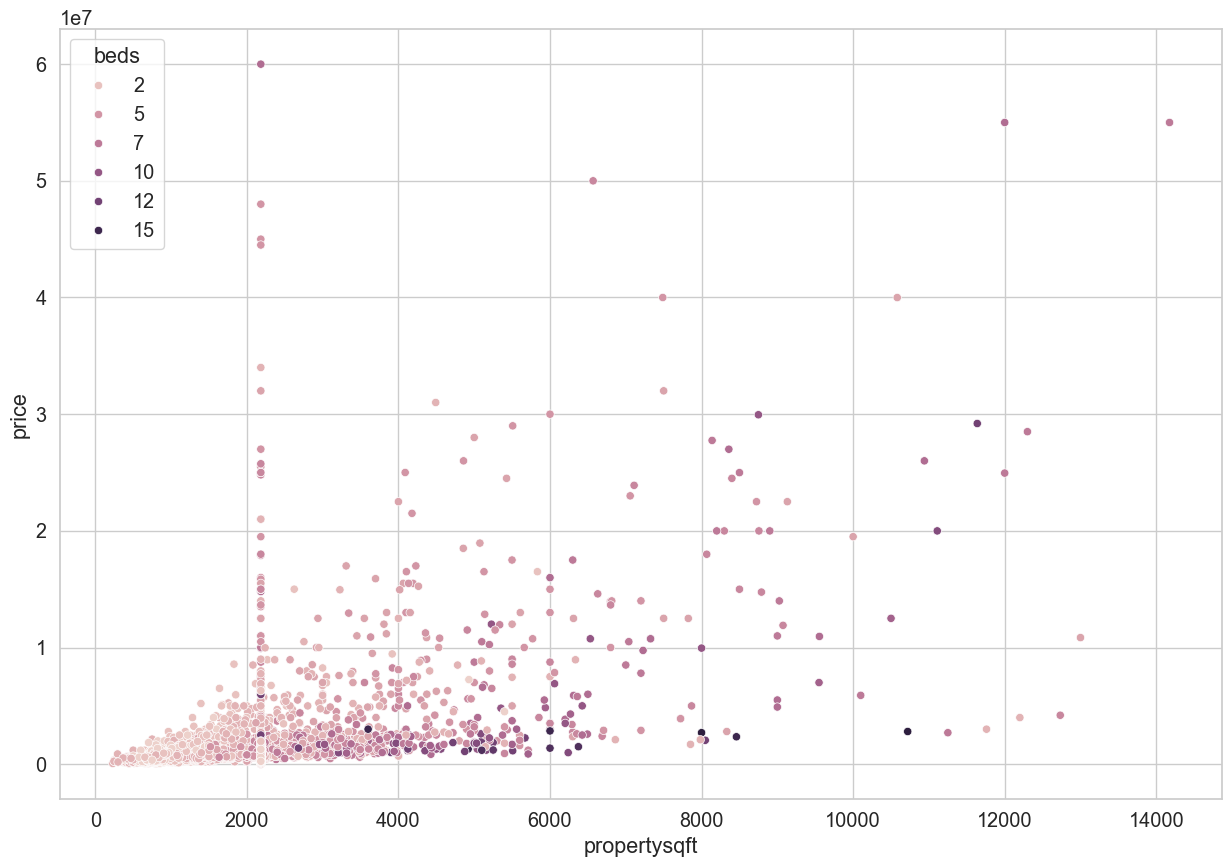

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df1,ax=ax,x='propertysqft',y='price',hue='beds')

/var/folders/lc/ffnfdhls4r705pmlf620r1jc0000gn/T/ipykernel_44519/1767493972.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df1['price'].loc[df1['price'].astype(int)<1.5*10**7],ax=ax,bins=30,kde=True,palette='Set2')


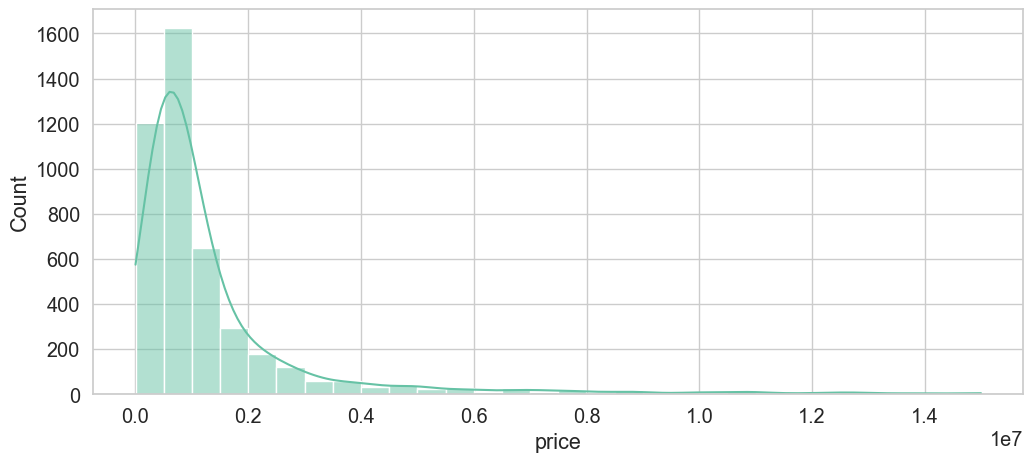

In [18]:
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(df1['price'].loc[df1['price'].astype(int)<1.5*10**7],ax=ax,bins=30,kde=True,palette='Set2')
plt.show()

In [21]:
lat = df['latitude']
lon = df['longitude']
price = df['price']
type = df['type']
beds = df['beds']
baths = df['bath']
sqft = df['propertysqft']
map = folium.Map(location=[40.76,-73.97], zoom_start = 10)
def color_change(price):
    if (price<=0.05*10**7):
        return('green')
    elif ( 0.05*10**7 < price <0.1*10**7):
        return('yellow')
    elif(0.1*10**7<=price<0.2*10**7):
        return('orange')
    elif(19*10**6<price):
        return('blue')
    else:
        return('red')

for lat, lon, price, type, beds, baths, sqft in zip(lat, lon, price, type, beds, baths, sqft):
    folium.CircleMarker(location=[lat, lon], radius = 6,fill_color=color_change(price), popup=f'{type} {str(beds)}beds {str(round(baths))}baths {str(sqft)}sqft {str(price)}$',color="gray",opacity=0.5, fill_opacity = 0.3).add_to(map)

map

In [22]:
map.save("map1.html")